In [2]:
import zipfile
path = 'Flight_Price_resources.zip'
zipfile.ZipFile(path).extractall('flight_data')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, r2_score
import pickle

In [4]:
df = pd.read_excel('flight_data/Data_Train.xlsx')

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df1 = df.copy()

In [13]:
def change_date(col):
    df1[col]=pd.to_datetime(df1[col])

In [14]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_date(i)

C:\Users\srich\AppData\Local\Temp\ipykernel_10492\1298778632.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col]=pd.to_datetime(df1[col])
C:\Users\srich\AppData\Local\Temp\ipykernel_10492\1298778632.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1[col]=pd.to_datetime(df1[col])
C:\Users\srich\AppData\Local\Temp\ipykernel_10492\1298778632.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1[col]=pd.to_datetime(df1[col])


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [17]:
df1['Day'] = df1['Date_of_Journey'].dt.day

In [18]:
df1['Month'] = df1['Date_of_Journey'].dt.month

In [19]:
df1['Year'] = df1['Date_of_Journey'].dt.year

In [20]:
df1 = df1.rename(columns = {'Day':'Journey_day',
                     'Month':'Journey_month',
                     'Year':'Journey_year'})

In [21]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-19 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-19 05:50:00,2024-01-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-19 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-01-19 18:05:00,2024-01-19 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-01-19 16:50:00,2024-01-19 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
def extract_time(col):
    df1[col+"_hour"] = df1[col].dt.hour
    df1[col+"_minute"] = df1[col].dt.minute

In [23]:
for i in ['Dep_Time', 'Arrival_Time']:
    extract_time(i)

In [24]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-19 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-19 05:50:00,2024-01-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-19 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-01-19 18:05:00,2024-01-19 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-01-19 16:50:00,2024-01-19 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [25]:
 df1.drop(['Dep_Time', 'Arrival_Time'],axis=1, inplace=True)

In [26]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [27]:
df1.shape

(10682, 16)

In [28]:
def sessions(x):
    if (x>=4) and (x<=8):
        return 'Early morning'
    elif (x>8) and (x<=12):
        return 'morning'
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "evening"
    elif (x>20) and (x<=00):
        return "night"
    else:
        return 'late night'

In [29]:
df1['Dep_Time_hour'].apply(sessions).value_counts()

Dep_Time_hour
Early morning    3050
evening          2357
morning          2209
Noon             1731
late night       1335
Name: count, dtype: int64

In [30]:
import plotly

In [31]:
!pip install cufflinks

In [32]:
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

In [33]:
from cufflinks.offline import go_offline

In [34]:
init_notebook_mode(connected=True)
go_offline()

In [35]:
df1['Dep_Time_hour'].apply(sessions).value_counts().iplot(kind='bar')

In [36]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [37]:
def duration(x):
    if 'h' not in x:
        x='00h'+" "+ x
    elif 'm' not in x:
        x= x+ " "+ "00m"
    return x    

In [38]:
df1['Duration'] = df1['Duration'].apply(duration)

In [39]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [40]:
df1['Duration_hour'] = df1['Duration'].apply(lambda x:x.split()[0][:-1])
df1['Duration_minutes'] = df1['Duration'].apply(lambda x:x.split()[1][:-1])

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_day          10682 non-null  int32         
 10  Journey_month        10682 non-null  int32         
 11  Journey_year         10682 non-null  int32         
 12  Dep_Time_hour        10682 non-null  int32         
 13  Dep_Time_minute      10682 non-null 

In [42]:
#sns.scatterplot(x='total_duration', y='Price', hue="Total_Stops", data=df1)

In [43]:
df1.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int32
Journey_month                   int32
Journey_year                    int32
Dep_Time_hour                   int32
Dep_Time_minute                 int32
Arrival_Time_hour               int32
Arrival_Time_minute             int32
Duration_hour                  object
Duration_minutes               object
dtype: object

In [44]:
cat=[col for col in df1.columns if df1[col].dtypes=='O']

In [45]:
df1['Airline'].dtypes

dtype('O')

In [46]:
cat

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_hour',
 'Duration_minutes']

In [47]:
num=[col for col in df1.columns if df1[col].dtypes!='O']

In [48]:
num

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [49]:
cat

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Duration_hour',
 'Duration_minutes']

In [50]:
for i in df1['Source'].unique():
     df1['source_'+i]=df1['Source'].apply([lambda x:1 if x==i else 0])  

In [51]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [52]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,...,25,4,25,19,00,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,5,23,30,5,25,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,50,21,35,4,45,1,0,0,0,0


In [53]:
df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [54]:
df1['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [55]:
df1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [56]:
airlines = df1.groupby(df1['Airline'])['Price'].mean().sort_values(ascending=True).index

In [57]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [58]:
for key, idx in enumerate(airlines, 0):
    print(key)

0
1
2
3
4
5
6
7
8
9
10
11


In [59]:
dict_airlines = {key:val for val,key in enumerate(airlines, 0)}

In [60]:
df1['Airline'] = df['Airline'].map(dict_airlines)

In [61]:
df1['Airline'].unique()

array([ 3,  7, 10,  1,  8,  4,  5,  2,  6, 11,  9,  0], dtype=int64)

In [62]:
dest = df1.groupby(df1['Destination'])['Price'].mean().sort_values(ascending=True).index

In [63]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [64]:
desti = {key:val for val, key in enumerate(dest,0)}

In [65]:
df1['Destination']=df1['Destination'].map(desti)

In [66]:
df1['Destination'].unique()

array([2, 3, 4, 0, 1], dtype=int64)

In [67]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,...,25,4,25,19,00,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,5,23,30,5,25,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,50,21,35,4,45,1,0,0,0,0


In [68]:
df1['Journey_year'].unique()

array([2019])

In [69]:
df1.drop(['Date_of_Journey', 'Route','Total_Stops','Additional_Info'], axis=1, inplace=True)

In [70]:
df1.shape

(10682, 19)

In [71]:
df1.drop('Duration', axis=1, inplace=True)

In [72]:
df1.drop('Journey_year', axis=1, inplace=True)

In [73]:
df1.drop('Source', axis=1, inplace=True)

In [74]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)
    plt.show()

C:\Users\srich\AppData\Local\Temp\ipykernel_10492\4006717399.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\srich\AppData\Local\Temp\ipykernel_10492\4006717399.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




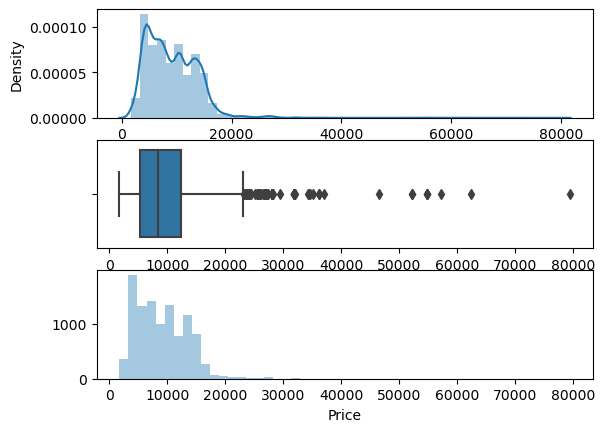

In [75]:
plot(df1, 'Price')

In [76]:
q1=df1['Price'].quantile(0.25)
q3=df1['Price'].quantile(0.75)

maximum = q3+1.5*(q3-q1)
minumum = q1-1.5*(q3-q1)

In [77]:
maximum

23017.0

In [78]:
minumum

-5367.0

In [79]:
df1['Price'] = np.where(df1['Price']>=35000, df1['Price'].median(), df1['Price'])

In [80]:
df1.Price

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [81]:
len([i for i in df1['Price'] if i>maximum or i<minumum])

81

C:\Users\srich\AppData\Local\Temp\ipykernel_10492\4006717399.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\srich\AppData\Local\Temp\ipykernel_10492\4006717399.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




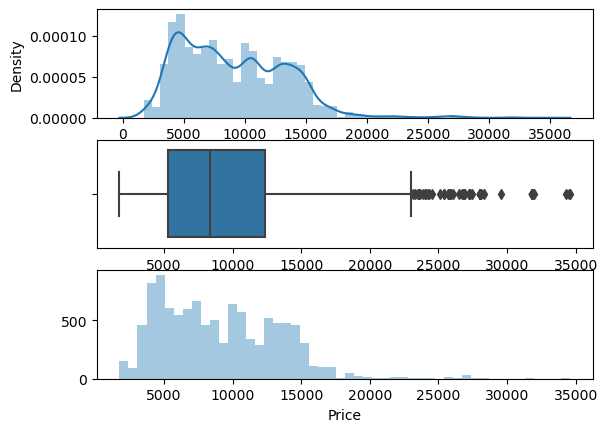

In [82]:
plot(df1, 'Price')

In [83]:
x=df1.drop('Price', axis=1)
y = df1['Price']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  

In [85]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [86]:
y_pred = rf.predict(x_test)
y_pred

array([16205.18      ,  5219.58      ,  8833.4       , ...,
        6533.04      , 12725.22583333, 13021.19133333])

In [87]:
print(r2_score(y_test, y_pred))

0.8081085984330285


In [88]:
file = open('flight_data/rf_model.pkl', 'wb')
pickle.dump(rf, file)

In [89]:
file2 = open('flight_data/rf_model.pkl', 'rb')
pickle.load(file2).predict(x_test)

array([16205.18      ,  5219.58      ,  8833.4       , ...,
        6533.04      , 12725.22583333, 13021.19133333])

In [90]:
df1

,Airline,Destination,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,13882.0,9,6,9,25,4,25,19,00,0,0,1,0,0
3,3,3,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,4107.0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,4145.0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,7229.0,27,4,8,20,11,20,3,00,1,0,0,0,0
10681,5,2,12648.0,1,3,11,30,14,10,2,40,1,0,0,0,0


In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
rf = RandomForestRegressor()

In [112]:
n_estimators = [int(i) for i in np.linspace(100, 600, 6)]
max_features=['auto', 'sqrt']
max_depth = [int(i) for i in np.linspace(5, 30, 4)]
min_samples_split = [5,10,15,100]

In [113]:
rf_dict = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'min_samples_split':min_samples_split
}

In [114]:
r=RandomizedSearchCV(estimator=rf, param_distributions=rf_dict, cv=3, n_jobs=-1, verbose=2)

In [115]:
r.fit(x_train, y_train)
y_pred1 = r.predict(x_test) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\srich\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srich\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srich\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\srich\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\srich\anaconda3\Lib\site-packages

In [116]:
y_pred1

array([14597.55048643,  5905.64761559,  8616.32104818, ...,
        6620.31810075, 12112.13396295, 12462.1710748 ])

In [117]:
r2_score(y_test, y_pred1)

0.8087093874254372

In [118]:
r

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   verbose=2)

In [119]:
r.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=600)

In [120]:
r.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [121]:
r.best_score_

0.7876437405398403